# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN_old import WGAN
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0032'
RUN_FOLDER = os.path.join("./run", RUN_ID)

BATCH_SIZE = 64
IMAGE_SIZE = 32

## data

In [3]:
label = 7
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


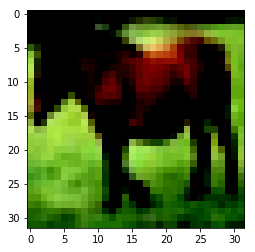

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [8]:
print(gan.model.to_json(indent=4))

{
    "class_name": "Model",
    "config": {
        "name": "model_3",
        "layers": [
            {
                "name": "model_input",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        100
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "name": "model_input"
                },
                "inbound_nodes": []
            },
            {
                "name": "model_2",
                "class_name": "Model",
                "config": {
                    "name": "model_2",
                    "layers": [
                        {
                            "name": "generator_input",
                            "class_name": "InputLayer",
                            "config": {
                                "batch_input_shape": [
                                    null,
         

In [9]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [10]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 32, 32, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
discriminator_conv_2 (Conv2D (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [11]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       204928    
__________

## training

In [19]:
gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , n_critic = 5
    , clip_threshold = 0.01
)

1362 (5, 1) [D loss: (0.060, -0.112, -0.026)]  [G loss: 0.183]
1363 (5, 1) [D loss: (0.074, -0.144, -0.035)]  [G loss: 0.219]
1364 (5, 1) [D loss: (0.089, -0.122, -0.016)]  [G loss: 0.209]
1365 (5, 1) [D loss: (0.090, -0.108, -0.009)]  [G loss: 0.193]
1366 (5, 1) [D loss: (0.097, -0.099, -0.001)]  [G loss: 0.135]
1367 (5, 1) [D loss: (0.077, -0.088, -0.006)]  [G loss: 0.133]
1368 (5, 1) [D loss: (0.043, -0.098, -0.027)]  [G loss: 0.168]
1369 (5, 1) [D loss: (0.033, -0.111, -0.039)]  [G loss: 0.196]
1370 (5, 1) [D loss: (0.035, -0.083, -0.024)]  [G loss: 0.165]
1371 (5, 1) [D loss: (0.023, -0.064, -0.020)]  [G loss: 0.115]
1372 (5, 1) [D loss: (-0.012, -0.062, -0.037)]  [G loss: 0.092]
1373 (5, 1) [D loss: (-0.043, -0.030, -0.036)]  [G loss: 0.046]
1374 (5, 1) [D loss: (-0.042, -0.003, -0.023)]  [G loss: 0.044]
1375 (5, 1) [D loss: (-0.007, -0.050, -0.029)]  [G loss: 0.121]
1376 (5, 1) [D loss: (-0.020, -0.070, -0.045)]  [G loss: 0.177]
1377 (5, 1) [D loss: (-0.042, -0.081, -0.061)]  [G

KeyboardInterrupt: 

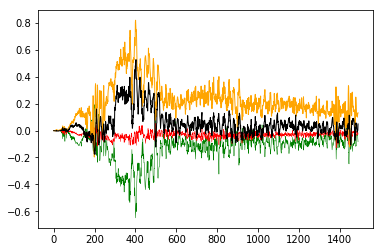

In [20]:
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=1)

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=1)
